In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/quera/Project2-quera/train_data.csv")

<ipython-input-3-95ea494d68aa>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("/content/drive/MyDrive/quera/Project2-quera/train_data.csv")


In [ ]:
train_data.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from tqdm import tqdm

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/quera/Project2-quera/train_data.csv")

<ipython-input-7-95ea494d68aa>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("/content/drive/MyDrive/quera/Project2-quera/train_data.csv")


In [ ]:

nltk.download(['punkt_tab', 'stopwords', 'wordnet'])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# stopword_list = nltk.corpus.stopwords.words('english')
# print(stopword_list)
# #  tokenize text
# def tokenize_text(text):
#   tokens = nltk.word_tokenize(text.lower())
#   tokens = [token.strip() for token in tokens]
#   return tokens

# # remove stop words
# def remove_stopwords(text):
#   tokens = tokenize_text(text)
#   filtered_tokens = [token for token in tokens if token not in
#                          stopword_list]
#   filtered_text = ' '.join(filtered_tokens)
#   return filtered_text




['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
# create linguistic_preprocessing function
def linguistic_preprocessing(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    return lemmatized_tokens

In [ ]:
linguistic_preprocessing(train_data['reviewText'][1])

['first',
 'time',
 "'ve",
 'ever',
 'remote',
 'needed',
 'programming',
 'whatsoever',
 'give',
 'bragging',
 'right',
 '.',
 '8780ls',
 "'ve",
 'certainly',
 'set',
 'first',
 '.',
 'yes',
 'wish',
 'silver',
 'white',
 'color',
 'would',
 'permit',
 'button',
 'easily',
 'read',
 'thinner',
 'hand',
 'atlas',
 'ocap',
 '5-device',
 'cable',
 'remote',
 'control',
 '1056b03',
 'best',
 'thing',
 'find',
 'samsung',
 'dvr',
 'samsung',
 'tv',
 'twc',
 'system',
 'ny',
 '.']

In [ ]:
train_data['cleaned_reviewText'] = train_data['reviewText'].apply(linguistic_preprocessing)


In [ ]:
# Train a Word2Vec model with hyperparameters
model = Word2Vec(train_data['cleaned_reviewText'], vector_size=300, window=5, min_count=10, sg=0, epochs=5)

In [ ]:
def get_similar_word(word):
  try:
    word = word.lower()
    similar_words = model.wv.most_similar(word, topn=5)
    for word, score in similar_words:
      print(f"{word.capitalize()}: {score:.2f}")
  except:
    print('No similar word found in vocabulary!')


In [ ]:
# Example usage
get_similar_word("warranty")

Warrantee: 0.84
Warrenty: 0.81
Squaretrade: 0.64
Warrantied: 0.62
Warranty-: 0.61


In [ ]:

get_similar_word("guarantee")

Warrenty: 0.60
Warranty: 0.60
Warranty-: 0.59
Guaranteed: 0.59
Warrantee: 0.56


In [ ]:

def get_similar_word(word):
    try:
        word = word.lower()
        similar_words = model.wv.most_similar(word, topn=5)
        return [word for word, score in similar_words]  # Return only words
    except KeyError:
        return []


In [ ]:
base_words = ['warranty', 'guarantee']
misspellings = ['warrantee', 'warrenty', 'guarentee', 'guaranty', 'guarantie']

similar_words = []
for word in base_words:
    similar_words.extend(get_similar_word(word))

all_keywords = set(base_words + similar_words + misspellings)
all_keywords = [word.lower() for word in all_keywords]

print("All keywords being used:", all_keywords)


All keywords being used: ['squaretrade', 'warranty', 'guarantee', 'warrantied', 'warranty-', 'guaranty', 'guarantie', 'guaranteed', 'warrenty', 'warrantee', 'guarentee']


In [ ]:
def get_similar_word(word, model):
    try:
        word = word.lower()
        similar_words = model.wv.most_similar(word, topn=5)
        return [word for word, score in similar_words]
        return []


In [ ]:
similar_words = []
for word in base_words:
    similar_words.extend(get_similar_word(word, model))

all_keywords = set(base_words + similar_words + misspellings)

print("All keywords being used:", all_keywords)


All keywords being used: {'squaretrade', 'warranty', 'guarantee', 'warrantied', 'warranty-', 'guaranty', 'guarantie', 'guaranteed', 'warrenty', 'warrantee', 'guarentee'}


In [ ]:
def contains_keyword(text, keywords):
    return any(word in text for word in keywords)

filtered_reviews = train_data[train_data['cleaned_reviewText'].apply(lambda x: contains_keyword(x, all_keywords))]

average_ratings = filtered_reviews.groupby('asin')['overall'].mean().reset_index()

average_ratings.columns = ['asin', 'average_warranty_rating']

print(average_ratings)

            asin  average_warranty_rating
0     6541654530                      1.0
1     9800466657                      5.0
2     B000001OM4                      4.0
3     B00000J4EY                      3.0
4     B00000K2YR                      1.0
...          ...                      ...
9943  B01HIS30OY                      3.0
9944  B01HIS5N3K                      5.0
9945  B01HIURQWE                      5.0
9946  B01HIWBU7Y                      5.0
9947  B01HJ8E11E                      5.0

[9948 rows x 2 columns]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


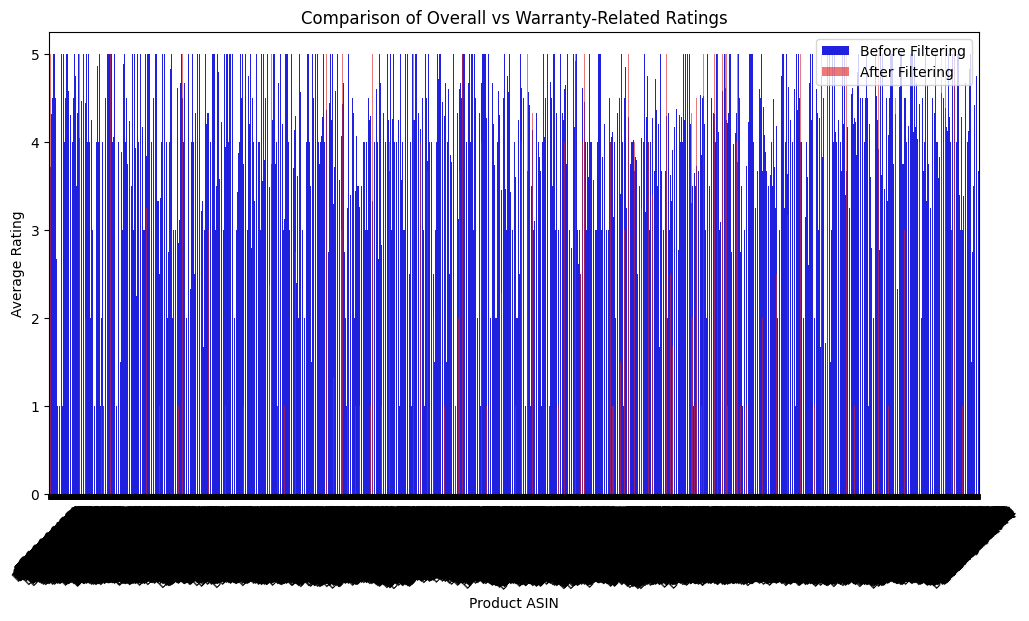

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_ratings = train_data.groupby('asin')['overall'].mean().reset_index()
mean_ratings.columns = ['asin', 'average_overall_rating']

comparison_df = mean_ratings.merge(average_ratings, on='asin', how='left')

comparison_df.fillna(0, inplace=True)

plt.figure(figsize=(12, 6))

sns.barplot(x='asin', y='average_overall_rating', data=comparison_df, color='blue', label='Before Filtering')
sns.barplot(x='asin', y='average_warranty_rating', data=comparison_df, color='red', alpha=0.6, label='After Filtering')

plt.xticks(rotation=45)
plt.xlabel("Product ASIN")
plt.ylabel("Average Rating")
plt.title("Comparison of Overall vs Warranty-Related Ratings")
plt.legend()
plt.show()
